### COO Assessment 2 - Question 2

- We are given the Prisoner's Dilemma as a Bargaining Problem
- The Prisoners’ Dilemma is a famous model for illustrating the conflict between social cooperation and self-interested behavior.
- We first import the necessary packages needed for this problem

In [12]:
# Import the libraries
import cvxpy as cp
import numpy as np
import matplotlib.pyplot as plt

- Consider a two player Prisoners’ Dilemma.
- The cooperative payoff possibilities are mathematically described by a polytope which is defined
as the convex hull of the payoff vectors (4,4), (6,0), (0,6) and (0,0).
- We plot this convex hull for the problem below

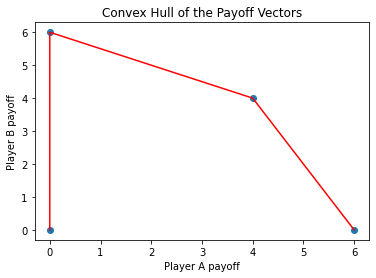

In [13]:
# We are going to model the Prisoner's Dilemma game using CVXPY
# The game is played between two players, A and B
# We are given that cooperative payoff possibilities are mathematically described by a polytope which is defined as the convex hull of the payoff vectors (4,4), (6,0), (0,6) and (0,0).

# Define the payoff vectors
payoff_vectors = np.array([[4,4],[6,0],[0,6],[0,0]])

# Define the convex hull of the payoff vectors
convex_hull = np.array([[0,0],[0,6],[4,4],[6,0]])

# Plot the payoff vectors and the convex hull
plt.plot(payoff_vectors[:,0], payoff_vectors[:,1], 'o')
plt.plot(convex_hull[:,0], convex_hull[:,1], 'r-')
plt.xlabel('Player A payoff')
plt.ylabel('Player B payoff')
plt.title('Convex Hull of the Payoff Vectors')
plt.show()

- We think of the Prisoner's Dilemma as a Bargaining situation with the disagreement point as $d = (d_1, d_2)$

- The notion of a disagreement point introduces a constraint that player $i$ cannot get a payoff below her disagreement point payoff $d_i$

- Upon modelling this situation given to us, we are presented with the following constraints:
$$
u_1 + 2u_2 \leq 12
$$
$$
u_2 + 2u_1 \leq 12
$$
$$
u_1 \geq d_1
$$
$$
u_2 \geq d_2
$$

- where $(u_1, u_2)$ is the payoff vectors for the two players in the bargaining situation.
- The constraints given above define the feasible set ($F$) for our constrained optimisation problem which we are going to solve in the forthcoming questions.

#### Question 2

- In this question, keeping the feasible set the same we need to maximise the Nash Welfare Criterion defined as:
$$
N(u_1, u_2) = \log(u_1-d_1) + \log(u_2-d_2) 
$$

- The Nash Bargaining Solution of the Bargaining Problem (i.e. our Objective Function) is given by:
$$
\max_{(u_1, u_2)} N(u_1, u_2)
$$
$$
such \space that \space (u_1, u_2) \in F
$$

- The disagreement point given to us is:
$$
(d_1, d_2) = (3.5, 2)
$$

### Part A

- First we use the CVXPY library to define the variables $u_1$ and $u_2$

In [14]:
# Define the variables
u1 = cp.Variable()
u2 = cp.Variable()

- Next we define the feasible set by adding the constraints to a list

In [15]:
# Feasible set for payoff vectors (u1, u2) for the problem is given as the inequalities:
# u1 + 2u2 <= 12
# 2u1 + u2 <= 12
# u1 > d1, u2 > d2
# where d1 and d2 are the minimum payoffs for each player d = (d1, d2) is the disagreement point
# d = (3.5, 2) is the disagreement point given in the problem to us

# Define the constraints
constraints = [u1 + 2*u2 <= 12, 2*u1 + u2 <= 12, u1 >= 3.5, u2 >= 2]

- Next we define the Nash Welfare Criterion as described above:

In [16]:
# Nash welfare criterion is defined as N(u1, u2) = log(u1-d1) + log(u2-d2)
# We need to maximize the Nash welfare criterion

# Define the objective function
objective = cp.Maximize(cp.log(u1-3.5) + cp.log(u2-2))

- We define our objective function as:
$$
\max_{(u_1, u_2)} W(u_1, u_2)
$$
$$
such \space that \space (u_1, u_2) \in F
$$

- We solve this problem and print the following as required by the question:
1. Nash Bargaining Solution ($u_1, u_2$)
2. Nash Welfare Criterion (N($u_1, u_2$))
3. The Dual Optimal Variables 

In [17]:
# Define the problem
problem = cp.Problem(objective, constraints)

# Solve the problem
problem.solve()

# Display the Nash bargaining solution
print('The Nash bargaining solution is given by the vector (u1, u2) :' )
print('u1 = {}'.format(u1.value))
print('u2 = {}'.format(u2.value))
print()

The Nash bargaining solution is given by the vector (u1, u2) :
u1 = 4.249999934669844
u2 = 3.5000001072596256



In [18]:
# Display the Nash welfare criterion (primal optimal value)
print('The Nash welfare criterion or the Primal Optimal Value is given by:')
print(problem.value)
print()

The Nash welfare criterion or the Primal Optimal Value is given by:
0.11778302005591901



In [19]:
# Display the dual optimal variables
print("The Dual Optimal Variables are: ")
for i in range(len(constraints)):
    print(constraints[i].dual_value)

The Dual Optimal Variables are: 
3.6170408140313444e-09
0.6666667548200322
3.202879721090295e-09
1.5363574774749631e-09


### Part B

- In this part we fix the disagreement payoff for player 2 at 2 (i.e. $d_2 = 2$)
- We define the variables

In [20]:
# In this part we fix disagreement payoff of player 2 (d2 = 2)
# In same figure we need to plot, how both player payoffs (u1, u2) varies as d1 varies over [2, 5]

# Define the variables
u1 = cp.Variable()
u2 = cp.Variable()

- It is given to us in this question that $d_1$ will vary from 2 to 5.
- We iterate over all values of $d_1$ fixing $d_2$ as 2 in the constraints.
- We solve the problem for each value of $d_1$ and store the corresponding values of $u_1$ and $u_2$ in 2 separate lists.
- We use these lists then to plot the variation in the same plot with different colours

In [21]:
# Range of disagreement payoff d1
d1_val = np.linspace(2, 5, 100)

u1_val = []
u2_val = []

for d1 in d1_val:
    # Define the constraints
    constraints = [u1 + 2*u2 <= 12, 2*u1 + u2 <= 12, u1 >= d1, u2 >= 2]

    # Nash welfare criterion is defined as N(u1, u2) = log(u1-d1) + log(u2-d2)
    # We need to maximize the Nash welfare criterion

    # Define the objective function
    objective = cp.Maximize(cp.log(u1-d1) + cp.log(u2-2))

    # Define the problem
    problem = cp.Problem(objective, constraints)

    # Solve the problem
    problem.solve()

    # Append the values of u1 and u2 for the corresponding d to their lists
    u1_val.append(u1.value)
    u2_val.append(u2.value)


- Plot the variation of $u_1$ and $u_2$ with $d_1$ over [2, 5]

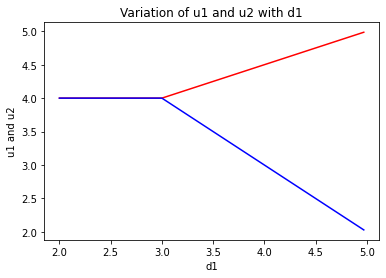

In [22]:
# Plot in the same figure with x-axis being d1 and y-axis being u1 and u2 with two separate colors
plt.plot(d1_val, u1_val, 'r-')
plt.plot(d1_val, u2_val, 'b-')
plt.xlabel('d1')
plt.ylabel('u1 and u2')
plt.title('Variation of u1 and u2 with d1')
plt.show()